In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline
#pd.set_option('display.max_rows', 100)

In [2]:
data = pd.read_csv('household_power_consumption.csv')
data.head(15)

/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [3]:
data.shape

(2075259, 9)

In [4]:
data.replace('?', np.nan, inplace=True)

In [5]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [6]:
for col in data.columns[2:]:
    data[col] = data[col].astype(np.float32)
    data[col].fillna(data[col].median(), inplace=True)
    
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [7]:
data.dtypes

Date                      object
Time                      object
Global_active_power      float32
Global_reactive_power    float32
Voltage                  float32
Global_intensity         float32
Sub_metering_1           float32
Sub_metering_2           float32
Sub_metering_3           float32
dtype: object

In [8]:
#{col: data.loc[:, col].unique() for col in data.columns}

In [9]:
data.Date = pd.to_datetime(data.Date, format='%d/%m/%Y')
data.Time = pd.to_datetime(data.Time ,format='%H:%M:%S').dt.time

In [10]:
data.dtypes

Date                     datetime64[ns]
Time                             object
Global_active_power             float32
Global_reactive_power           float32
Voltage                         float32
Global_intensity                float32
Sub_metering_1                  float32
Sub_metering_2                  float32
Sub_metering_3                  float32
dtype: object

In [11]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.085021e+00,1.233407e-01,2.435262e+02,4.605681e+00,1.107879e+00,1.282264e+00,6.390116e+00
std,1.051831e+00,1.121804e-01,4.189448e+00,4.421474e+00,6.065568e+00,5.725405e+00,8.433647e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


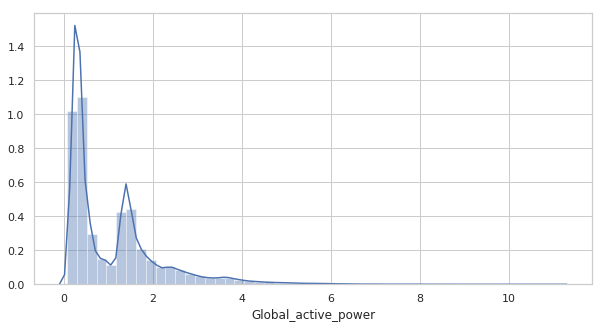

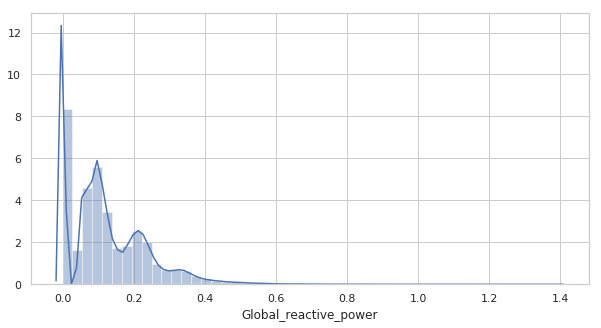

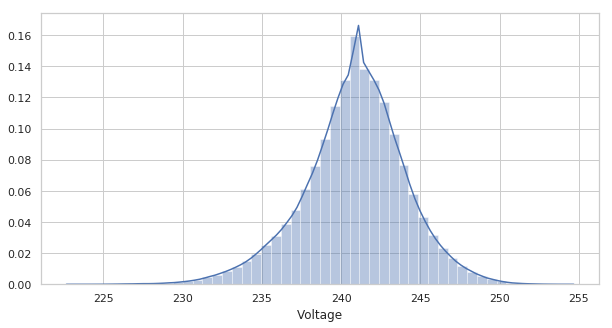

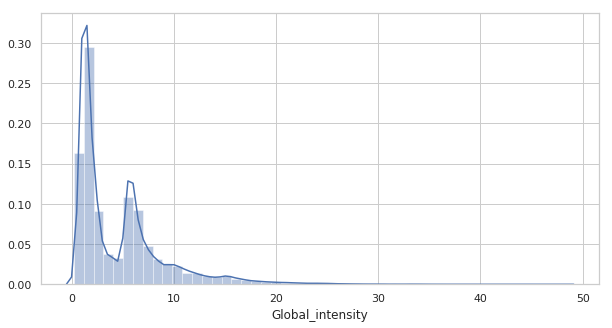

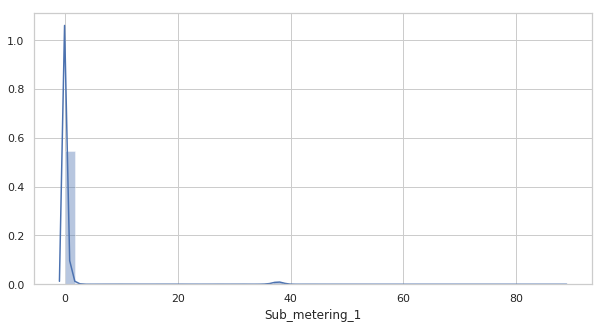

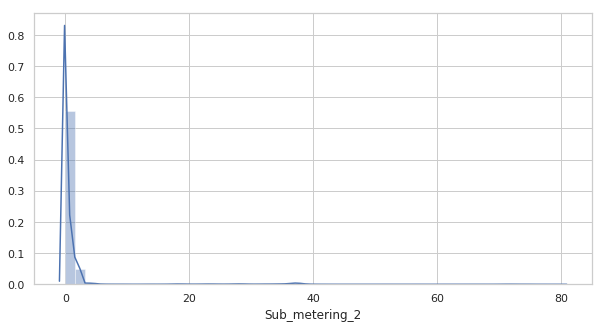

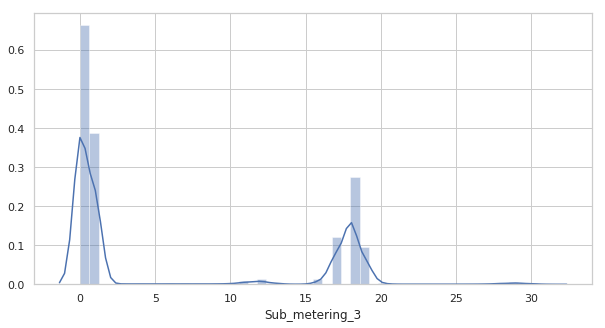

In [19]:
for col in data.columns[2:]:
    plt.figure(figsize=(10, 5))
    sns.distplot(data[col])

In [12]:
daily_data = data.copy()
daily_data.set_index('Date', inplace=True)
daily_data = daily_data.resample('D').mean()
daily_data.dropna()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16,3.053475,0.088187,236.243759,13.082829,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087021,9.999028,1.411806,2.907639,9.264584
2006-12-18,1.530435,0.112356,241.231689,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308060,6.467361,0.000000,1.838889,9.765972
2006-12-21,1.192936,0.100254,241.040512,5.030416,1.225694,1.821528,7.238194
2006-12-22,1.625929,0.129796,241.184555,6.872917,2.188195,0.243056,7.729861
2006-12-23,3.314851,0.153799,240.136078,14.028055,1.853472,0.295139,10.226389
2006-12-24,1.770842,0.104097,241.687439,7.640417,1.182639,3.529167,4.785417


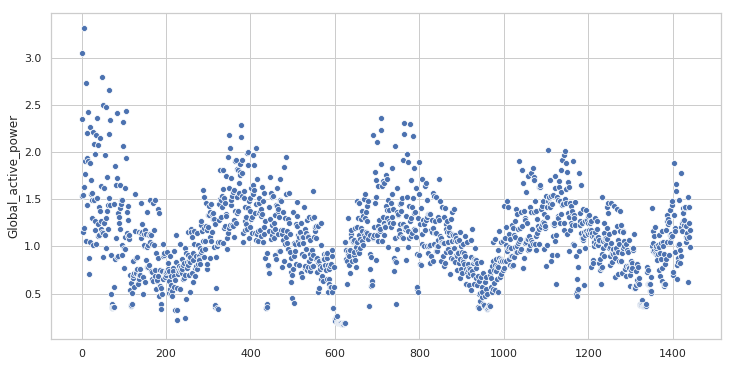

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=np.arange(daily_data.shape[0]), y=daily_data.Global_active_power)

In [13]:
yearly_data = daily_data.resample('Y').mean()
yearly_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-31,1.953278,0.129423,241.205551,8.257972,1.191840,2.176713,7.636360
2007-12-31,1.113156,0.117235,239.396057,4.748312,1.222504,1.625495,5.758697
2008-12-31,1.071976,0.117105,240.626526,4.551475,1.109563,1.255891,6.032411
2009-12-31,1.074756,0.131152,241.887131,4.539104,1.127582,1.126608,6.775297
2010-12-31,1.044016,0.128323,241.496323,4.408916,0.950836,1.060528,7.012630


In [14]:
monthly_data = daily_data.resample('M').mean()
monthly_data.index = monthly_data.index.month
monthly_data = monthly_data.groupby('Date').agg(np.mean)
monthly_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
1,1.447122,0.110533,242.157135,6.076597,1.381788,1.521645,7.674770
2,1.301187,0.099773,241.466812,5.450069,1.133160,1.386227,7.597459
3,1.224184,0.111128,241.522736,5.147488,1.252313,1.642798,6.861061
4,1.037547,0.122288,241.043991,4.384674,1.052431,1.147946,6.555776
5,1.029554,0.127902,239.008591,4.403090,1.234868,1.307762,6.696617
6,0.903192,0.145357,239.933685,3.900951,1.305029,1.220278,6.071805
7,0.700283,0.151849,240.004425,3.061961,0.707090,0.991465,4.273236
8,0.574143,0.137647,240.211975,2.518486,0.485249,0.768229,3.727044
9,0.964318,0.131878,240.469193,4.122170,1.120857,1.148837,6.193906


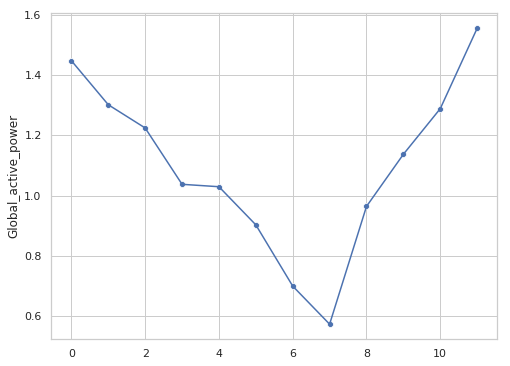

In [16]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=np.arange(monthly_data.shape[0]), y=monthly_data.Global_active_power)
sns.lineplot(x=np.arange(12), y=monthly_data.Global_active_power)

In [17]:
# So in a daily average Global_active_power grows down and there's some seasonal behavior here.
# Yearly average proofs first one and monthly shows us seasonal dependensies 

In [15]:
data['active_energy_consumption']  = data.Global_active_power * 1000 / 60 - data.Sub_metering_1 - data.Sub_metering_2 - data.Sub_metering_3
two_days = data.loc[(data.Date == '2008-02-01') | (data.Date == '2008-02-02')]
two_days

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy_consumption
592236,2008-02-01,00:00:00,2.268,0.184,239.789993,9.4,0.0,0.0,18.0,19.799999
592237,2008-02-01,00:01:00,2.210,0.188,240.699997,9.2,0.0,0.0,17.0,19.833332
592238,2008-02-01,00:02:00,2.270,0.184,239.960007,9.4,0.0,0.0,18.0,19.833332
592239,2008-02-01,00:03:00,2.238,0.182,239.630005,9.4,0.0,0.0,18.0,19.299999
592240,2008-02-01,00:04:00,2.204,0.184,240.110001,9.2,0.0,0.0,17.0,19.733334
592241,2008-02-01,00:05:00,2.272,0.186,240.490005,9.4,0.0,0.0,18.0,19.866665
592242,2008-02-01,00:06:00,2.272,0.186,240.500000,9.4,0.0,0.0,18.0,19.866665
592243,2008-02-01,00:07:00,2.268,0.184,240.399994,9.4,0.0,0.0,18.0,19.799999
592244,2008-02-01,00:08:00,2.224,0.190,241.259995,9.2,0.0,0.0,18.0,19.066666
592245,2008-02-01,00:09:00,2.236,0.194,242.240005,9.2,0.0,0.0,18.0,19.266666


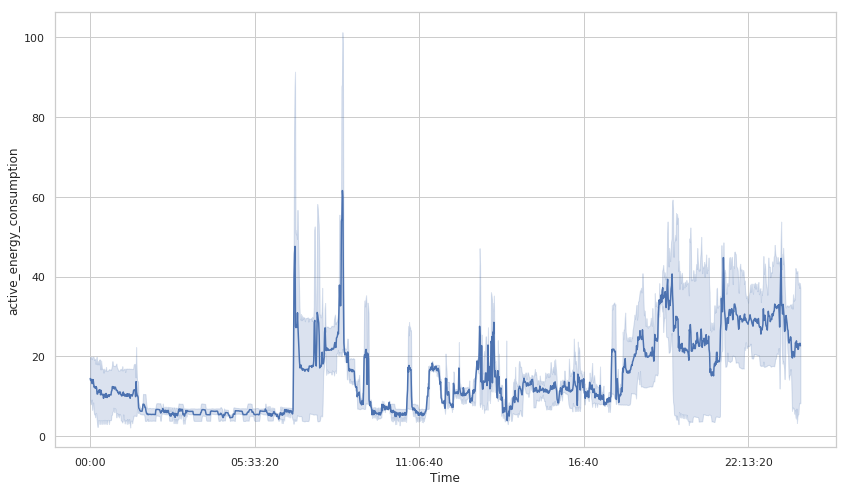

In [19]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(x='Time',y='active_energy_consumption', data=two_days)

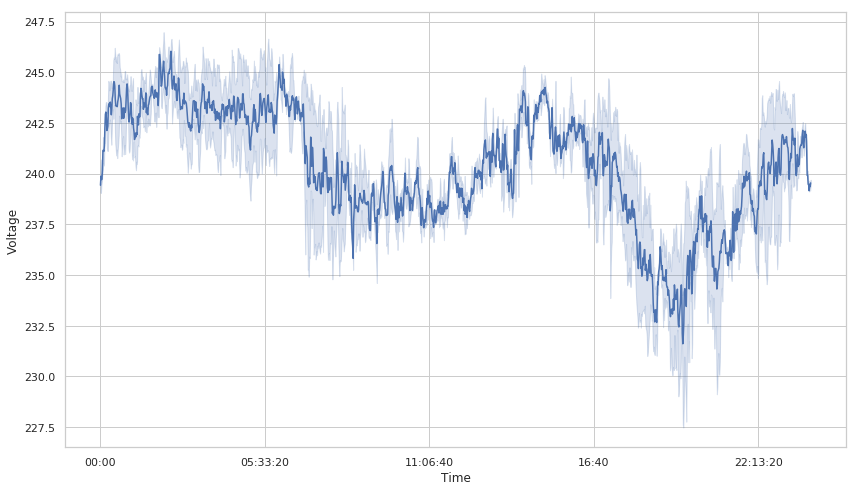

In [20]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(x='Time',y='Voltage', data=two_days)

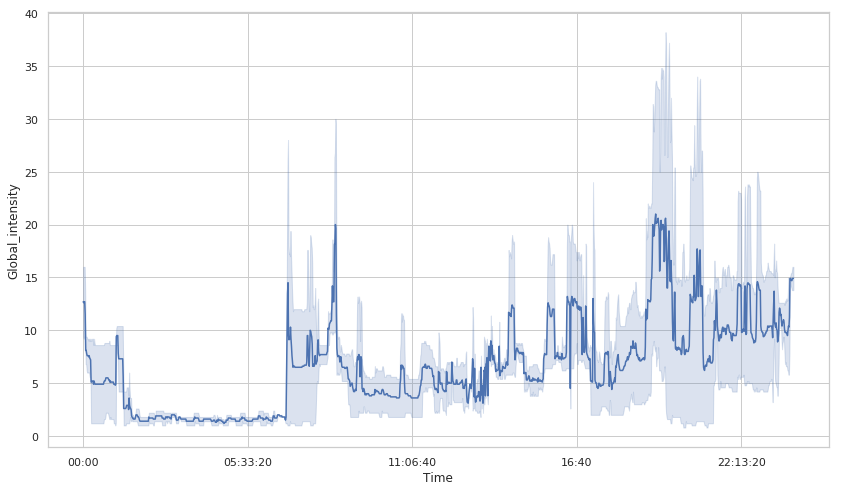

In [21]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(x='Time', y='Global_intensity', data=two_days)

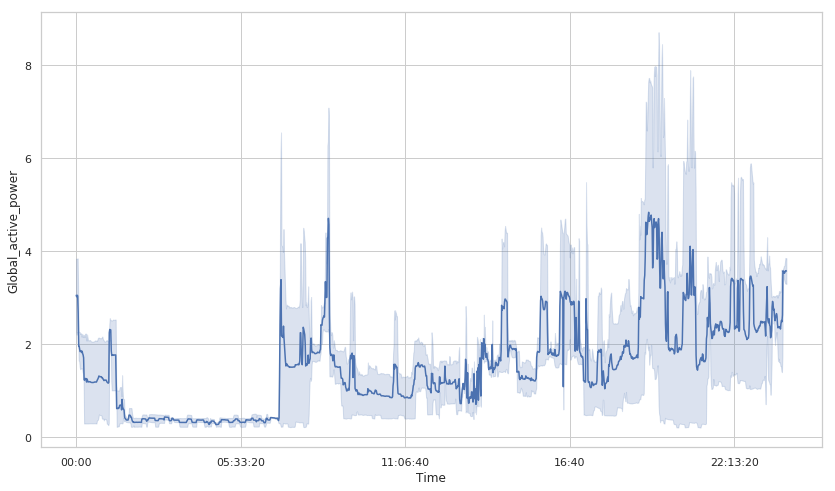

In [22]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(x='Time', y='Global_active_power', data=two_days)

In [16]:
combined = two_days[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Time']].melt(id_vars='Time')
combined

,Time,variable,value
0,00:00:00,Sub_metering_1,0.0
1,00:01:00,Sub_metering_1,0.0
2,00:02:00,Sub_metering_1,0.0
3,00:03:00,Sub_metering_1,0.0
4,00:04:00,Sub_metering_1,0.0
5,00:05:00,Sub_metering_1,0.0
6,00:06:00,Sub_metering_1,0.0
7,00:07:00,Sub_metering_1,0.0
8,00:08:00,Sub_metering_1,0.0
9,00:09:00,Sub_metering_1,0.0


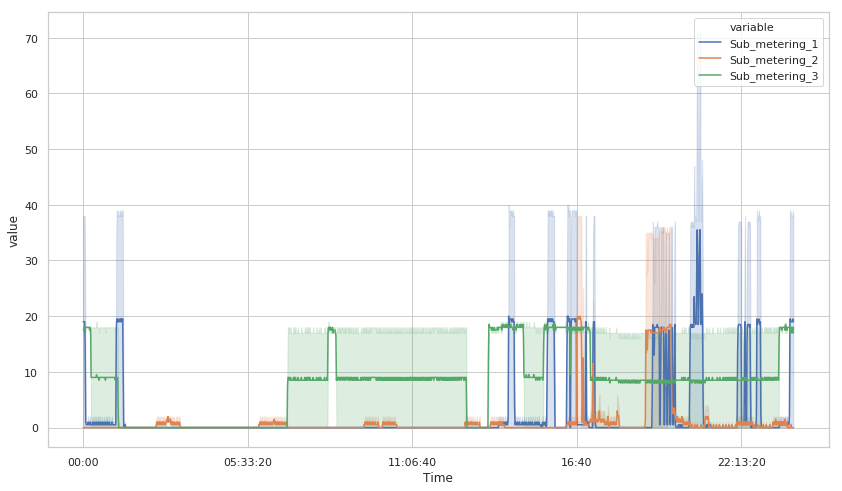

In [24]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(x='Time', y='value', hue='variable', data=combined)

In [17]:
Q1 = data['Voltage'].quantile(0.25)
Q3 = data['Voltage'].quantile(0.75)
IQR = Q3 - Q1
outliers_vol = data[(data['Voltage'] < (Q1 - 1.5 * IQR)) | (data['Voltage'] > (Q3 + 1.5 * IQR))]

Q1 = data['Global_intensity'].quantile(0.25)
Q3 = data['Global_intensity'].quantile(0.75)
IQR = Q3 - Q1
outliers_inten = data[(data['Global_intensity'] < (Q1 - 1.5 * IQR)) | (data['Global_intensity'] > (Q3 + 1.5 * IQR))]


In [18]:
outliers_vol.Date.dt.date.unique()

array([datetime.date(2006, 12, 16), datetime.date(2006, 12, 17),
       datetime.date(2006, 12, 18), datetime.date(2006, 12, 19),
       datetime.date(2006, 12, 20), datetime.date(2006, 12, 21),
       datetime.date(2006, 12, 22), datetime.date(2006, 12, 23),
       datetime.date(2006, 12, 24), datetime.date(2006, 12, 25),
       datetime.date(2006, 12, 26), datetime.date(2006, 12, 27),
       datetime.date(2006, 12, 28), datetime.date(2006, 12, 29),
       datetime.date(2006, 12, 30), datetime.date(2006, 12, 31),
       datetime.date(2007, 1, 2), datetime.date(2007, 1, 4),
       datetime.date(2007, 1, 5), datetime.date(2007, 1, 6),
       datetime.date(2007, 1, 7), datetime.date(2007, 1, 8),
       datetime.date(2007, 1, 9), datetime.date(2007, 1, 10),
       datetime.date(2007, 1, 11), datetime.date(2007, 1, 13),
       datetime.date(2007, 1, 14), datetime.date(2007, 1, 15),
       datetime.date(2007, 1, 17), datetime.date(2007, 1, 18),
       datetime.date(2007, 1, 19), datetime.da

In [19]:
outliers_inten.Date.dt.date.unique()

array([datetime.date(2006, 12, 16), datetime.date(2006, 12, 17),
       datetime.date(2006, 12, 18), ..., datetime.date(2010, 11, 24),
       datetime.date(2010, 11, 25), datetime.date(2010, 11, 26)],
      dtype=object)

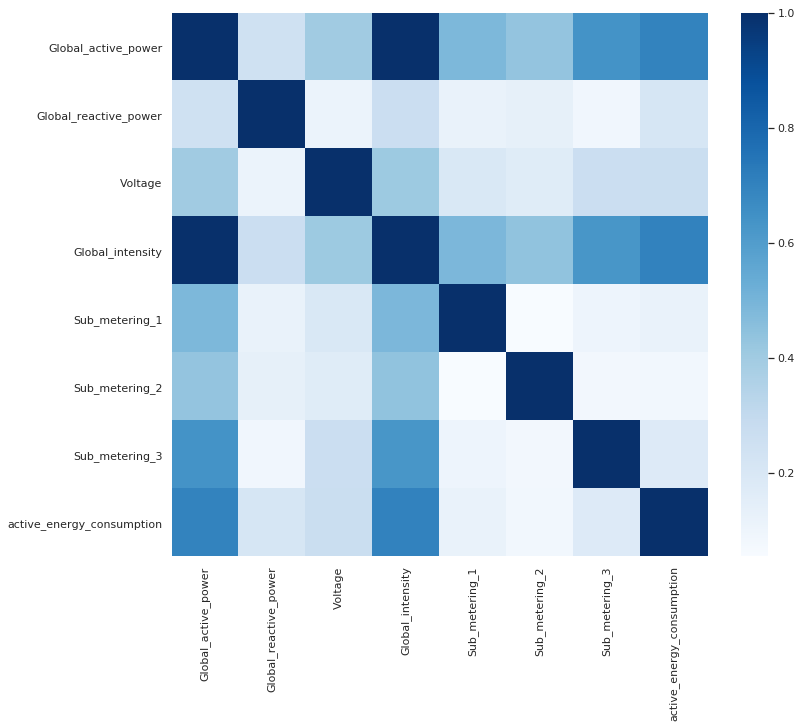

In [20]:
plt.subplots(figsize=(12, 10))
sns.heatmap(data.corr().abs(), cmap="Blues")

In [21]:
# So we can drop ['Global_intensity'] couse of correlation to target

In [ ]:
import pandas_profiling

pandas_profiling.ProfileReport(data)

In [68]:
X = data.drop('Global_active_power', axis=1)
y = data.Global_active_power

X['month'] = X.Date.dt.month.astype(np.float32)
X['day_of_weak'] = X.Date.dt.weekday.astype(np.float32)
X['hour'] = X.Time.apply(lambda x: str(x)[:2]).astype(np.float32)
X['minute'] = X.Time.apply(lambda x: str(x)[3:5]).astype(np.float32)
X['year'] = X.Date.dt.year.astype(np.float32)

X

,Date,Time,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy_consumption,month,day_of_weak,hour,minute,year
0,2006-12-16,17:24:00,0.418,234.839996,18.400000,0.0,1.0,17.0,52.266670,12.0,5.0,17.0,24.0,2006.0
1,2006-12-16,17:25:00,0.436,233.630005,23.000000,0.0,1.0,16.0,72.333336,12.0,5.0,17.0,25.0,2006.0
2,2006-12-16,17:26:00,0.498,233.289993,23.000000,0.0,2.0,17.0,70.566666,12.0,5.0,17.0,26.0,2006.0
3,2006-12-16,17:27:00,0.502,233.740005,23.000000,0.0,1.0,17.0,71.800003,12.0,5.0,17.0,27.0,2006.0
4,2006-12-16,17:28:00,0.528,235.679993,15.800000,0.0,1.0,17.0,43.099998,12.0,5.0,17.0,28.0,2006.0
5,2006-12-16,17:29:00,0.522,235.020004,15.000000,0.0,2.0,17.0,39.666668,12.0,5.0,17.0,29.0,2006.0
6,2006-12-16,17:30:00,0.520,235.089996,15.800000,0.0,1.0,17.0,43.700001,12.0,5.0,17.0,30.0,2006.0
7,2006-12-16,17:31:00,0.520,235.220001,15.800000,0.0,1.0,17.0,43.666668,12.0,5.0,17.0,31.0,2006.0
8,2006-12-16,17:32:00,0.510,233.990005,15.800000,0.0,1.0,17.0,43.133335,12.0,5.0,17.0,32.0,2006.0
9,2006-12-16,17:33:00,0.510,233.860001,15.800000,0.0,2.0,16.0,43.033333,12.0,5.0,17.0,33.0,2006.0


In [74]:
def sliding_window_prep(y, fill_value=None, periods=1):
    fill_value = y.median(axis=0) if not fill_value else fill_value 
    
    return y.shift(periods=periods, fill_value=fill_value)

sliding_window_prep(y)

0          0.602
1          4.216
2          5.360
3          5.374
4          5.388
5          3.666
6          3.520
7          3.702
8          3.700
9          3.668
10         3.662
11         4.448
12         5.412
13         5.224
14         5.268
15         4.054
16         3.384
17         3.270
18         3.430
19         3.266
20         3.728
21         5.894
22         7.706
23         7.026
24         5.174
25         4.474
26         3.248
27         3.236
28         3.228
29         3.258
           ...  
2075229    0.982
2075230    0.978
2075231    0.968
2075232    0.960
2075233    0.964
2075234    0.980
2075235    0.976
2075236    0.984
2075237    0.986
2075238    0.990
2075239    0.988
2075240    0.988
2075241    0.982
2075242    0.972
2075243    0.908
2075244    0.910
2075245    0.912
2075246    0.948
2075247    1.198
2075248    1.024
2075249    0.946
2075250    0.944
2075251    0.946
2075252    0.946
2075253    0.942
2075254    0.946
2075255    0.946
2075256    0.9

In [75]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index[:5])
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

TRAIN: [     0      1      2 ... 345876 345877 345878] TEST: [345879 345880 345881 345882 345883]
TRAIN: [     0      1      2 ... 691752 691753 691754] TEST: [691755 691756 691757 691758 691759]
TRAIN: [      0       1       2 ... 1037628 1037629 1037630] TEST: [1037631 1037632 1037633 1037634 1037635]
TRAIN: [      0       1       2 ... 1383504 1383505 1383506] TEST: [1383507 1383508 1383509 1383510 1383511]
TRAIN: [      0       1       2 ... 1729380 1729381 1729382] TEST: [1729383 1729384 1729385 1729386 1729387]
